## 자율주제(과제)
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시) 
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?

### 서울의 약국은 얼마나 병원 근처에 있을까?
가설: 대부분(90%)의 약국들이 병원 근처에 있을 것이다.

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('data/상가(상권)정보_의료기관_201909.csv', low_memory=False) 

**전체 상권정보 데이터 중에 서울특별시의 데이터만 추출합니다.**

In [259]:
print(df.shape)
df = df[df['시도명'] == '서울특별시']
print(df.shape)

(91335, 39)
(18943, 39)


In [260]:
df['시군구명'].unique()

array(['강남구', '강동구', '노원구', '서초구', '서대문구', '영등포구', '관악구', '종로구', '중랑구',
       '성동구', '용산구', '동대문구', '광진구', '강서구', '마포구', '금천구', '송파구', '동작구',
       '양천구', '중구', '도봉구', '은평구', '강북구', '성북구', '구로구'], dtype=object)

In [261]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '유사의료업', '수의업', '의료관련서비스업'], dtype=object)

In [262]:
df[df['상권업종중분류명'] == '병원']['상권업종소분류명'].unique()

array(['내과/외과', '정형/성형외과', '소아과', '한의원', '치과의원', '일반병원', '기타병원',
       '이비인후과의원', '피부과', '산부인과', '종합병원', '노인/치매병원', '한방병원', '치과병원',
       '안과의원', '신경외과', '비뇨기과'], dtype=object)

In [263]:
df['상권업종소분류명'].unique()

array(['내과/외과', '정형/성형외과', '소아과', '약국', '한의원', '치과의원', '일반병원', '기타병원',
       '침구원', '이비인후과의원', '동물병원', '척추교정치료', '피부과', '산부인과', '한약방', '종합병원',
       '탕제원', '산후조리원', '노인/치매병원', '한방병원', '언어치료', '응급구조대', '치과병원', '혈액원',
       '안과의원', '신경외과', '비뇨기과', '유사의료업기타', '치과기공소', '수의업-종합', '접골원', '조산원',
       '수의업-기타'], dtype=object)

**상권업종중분류명에 '병원'인 것만 추출하고 '한의원'과 '한방병원'은 제외하겠습니다.**

In [281]:
print(df.shape)
hos_df = df[df['상권업종중분류명'] == '병원']
hos_df = hos_df[~hos_df['상권업종소분류명'].isin(['한의원', '한방병원'])]
print(hos_df.shape)
hos_df.head()

(18943, 39)
(10342, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
44,20912401,아미가성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010100109020001015305,원등빌딩,서울특별시 서초구 방배로20길 4,137060.0,6664.0,NaN,3,NaN,126.995334,37.485498


**마찬가지로 약국만 추출하겠습니다.**

In [282]:
ph_df = df[df['상권업종소분류명'] == '약국']
ph_df.shape

(3579, 39)

In [283]:
ph_df['상권업종소분류명'].value_counts()

약국    3579
Name: 상권업종소분류명, dtype: int64

**그럼 병원과 약국의 구별로 분포가 어떤지 보겠습니다**

In [267]:
# countplot xticks 정렬을 위한 list
gu_list = list(hos_df['시군구명'].value_counts().index)

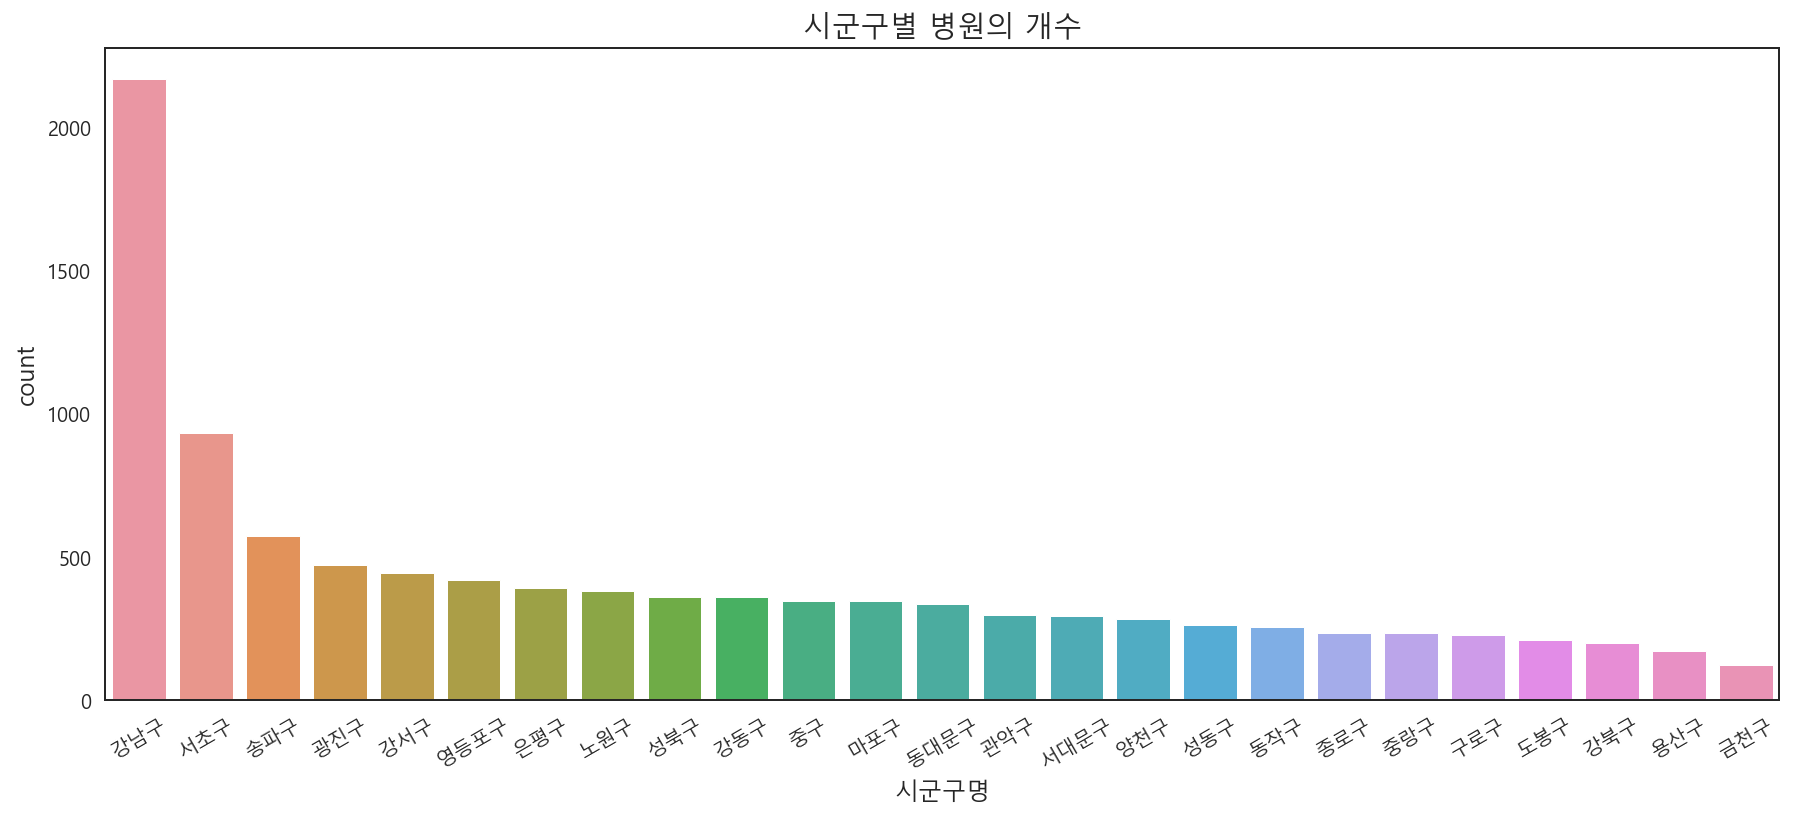

In [305]:
plt.figure(figsize=(15, 6))
g = sns.countplot(x='시군구명', data=hos_df, order=gu_list)
g.set_title("시군구별 병원의 개수")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

**병원이 가장 많은 곳은 강남구입니다.**
* 두번째로 많은 곳은 서초구입니다.
* 그 외에 송파구, 강서구, 광진구가 많으나 대부분 유사합니다.

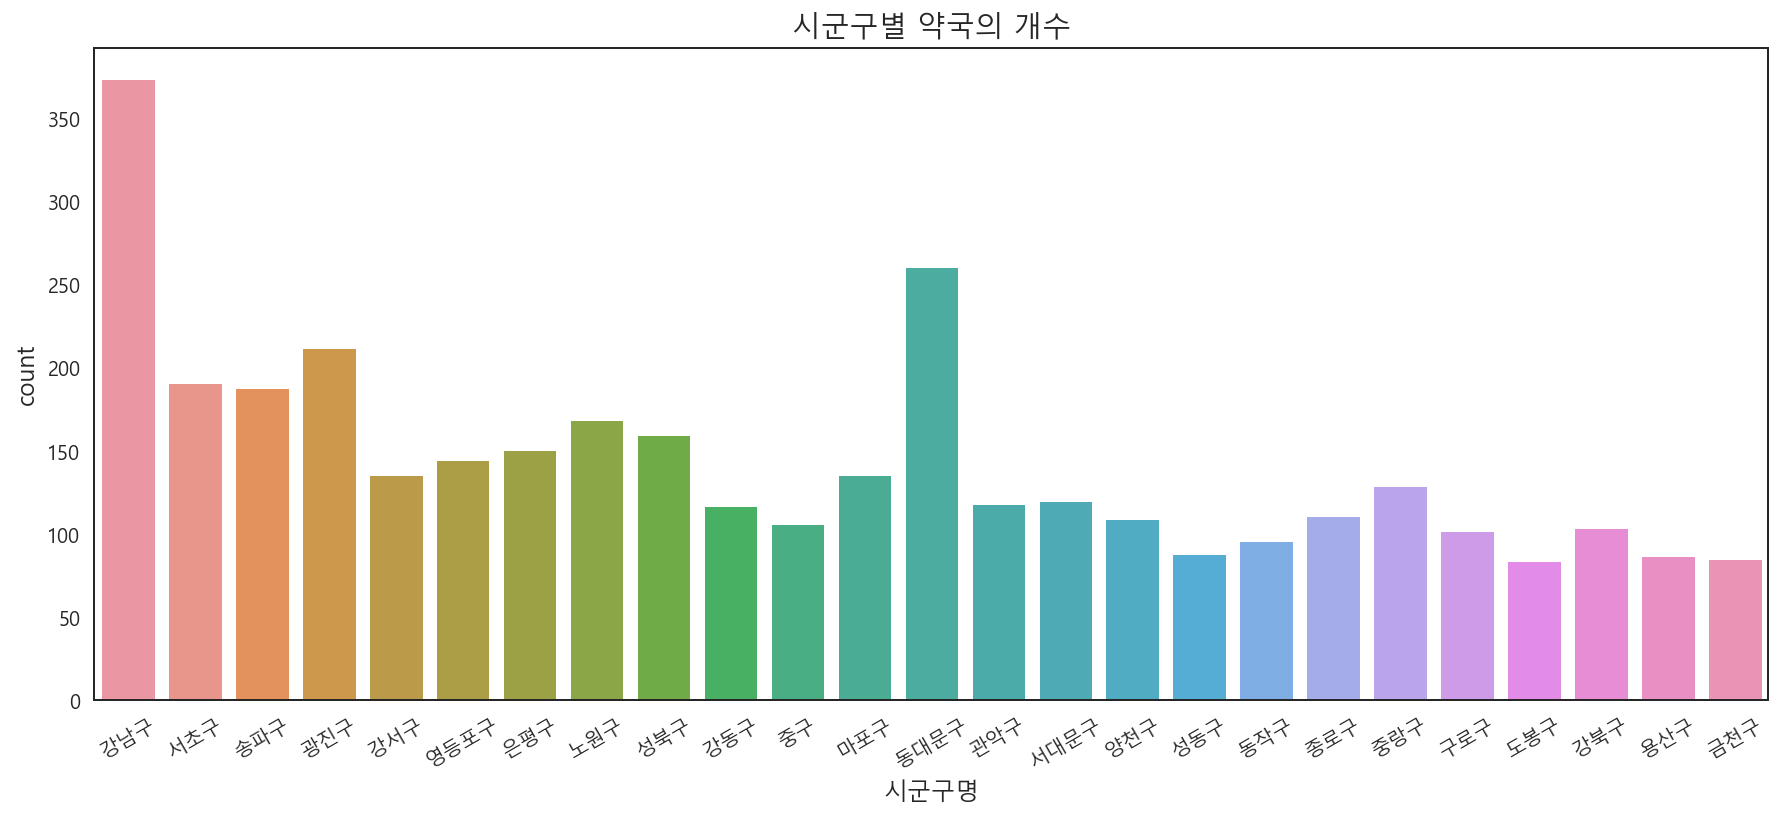

In [306]:
plt.figure(figsize=(15, 6))
g = sns.countplot(x='시군구명', data=ph_df, order=gu_list)
g.set_title("시군구별 약국의 개수")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

**약국도 가장 많은 곳은 강남구입니다.**
* 두번째로 많은 곳이 동대문구입니다.
* 병원에서는 중간 정도의 빈도였는데 상대적으로 약국은 많은 지역입니다.

In [270]:
# 시각화를 위한 dataframe merge
hos_ph_df = pd.concat([hos_df, ph_df])
hos_ph_df.shape

(13921, 39)

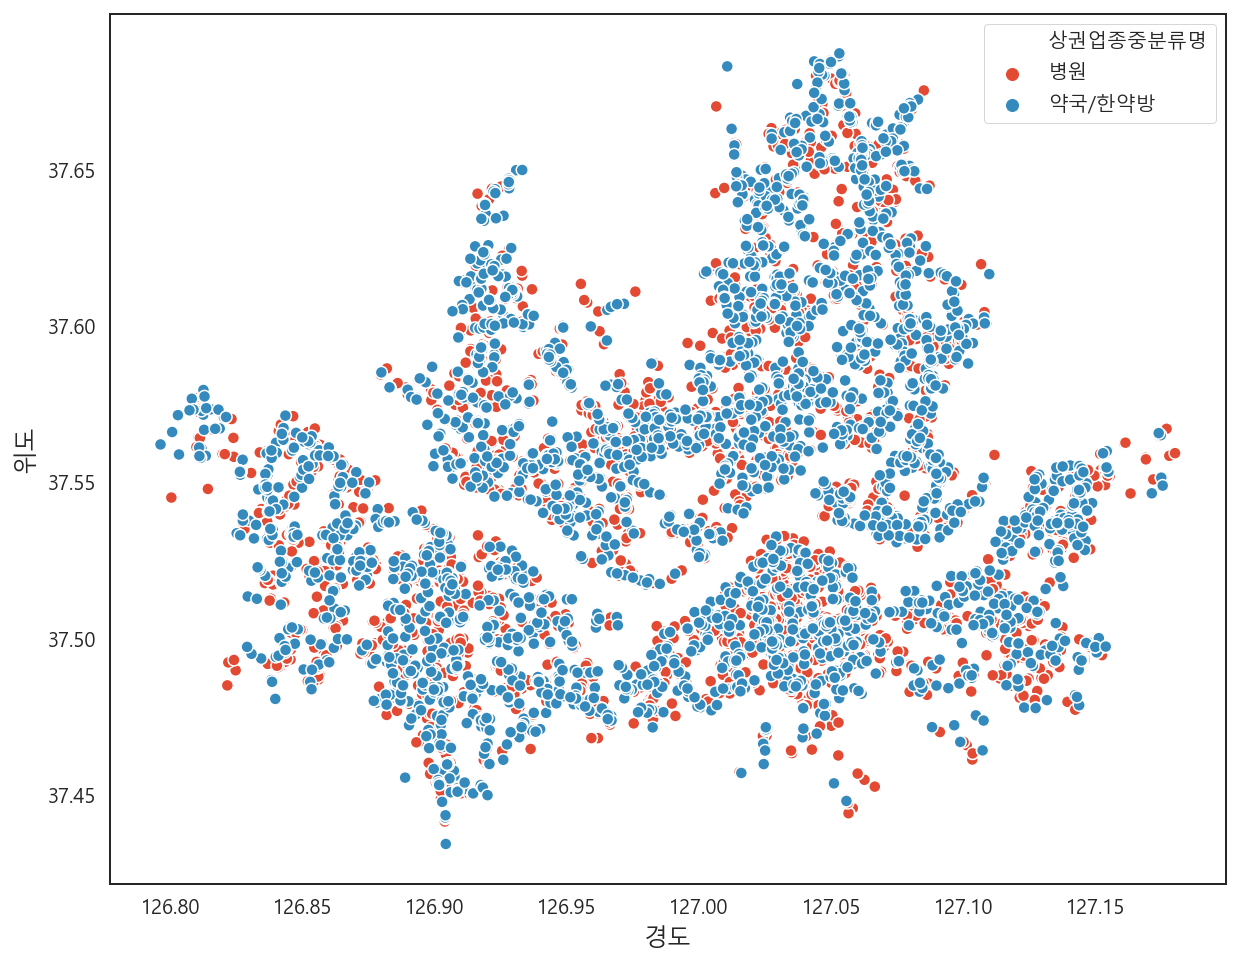

In [271]:
plt.figure(figsize=(10, 8))
sns.set_style("white") # 배경색 = white
plt.rc("font", family=font_family)
sns.scatterplot(x='경도', y='위도', data=hos_ph_df, hue='상권업종중분류명')
plt.show()

http://www.kmpnews.co.kr/news/articleView.html?idxno=667  
**해당 기사에서 병원에 인접한 약국을 40~50m로 얘기하고 있기 때문에**  
**50m 근처에 병원이 있는 약국을 "병원 근처에 있다"라고 하겠습니다.**

Haversine formula를 이용해서 위경도를 통해 거리를 계산하겠습니다.  
이를 위해 haversine 라이브러리를 사용합니다.  
https://pypi.org/project/haversine/

In [166]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [289]:
from haversine import haversine

In [284]:
# dataframe index 재설정
ph_df = ph_df.reset_index(drop=True)
hos_df = hos_df.reset_index(drop=True)

In [285]:
def get_nearby_hospital(df):
    ph_lat_long = df['위도'], df['경도']

    check_num = 0
    
    for i in range(len(hos_df)):
        hos_lat_long = hos_df.loc[i, '위도'], hos_df.loc[i, '경도']
        distance_diff = haversine(ph_lat_long, hos_lat_long) * 1000
        if distance_diff <= 50:
            check_num = 1
            break
    return check_num
    

In [286]:
ph_df['nearby_hospital'] = ph_df.apply(get_nearby_hospital, axis=1)
ph_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,nearby_hospital
0,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656,1
1,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135,1
2,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1,NaN,127.092597,37.616424,1
3,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1,NaN,127.027513,37.556238,1
4,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1,NaN,127.060556,37.587349,0


In [288]:
ph_df['nearby_hospital'].value_counts()

1    2279
0    1300
Name: nearby_hospital, dtype: int64

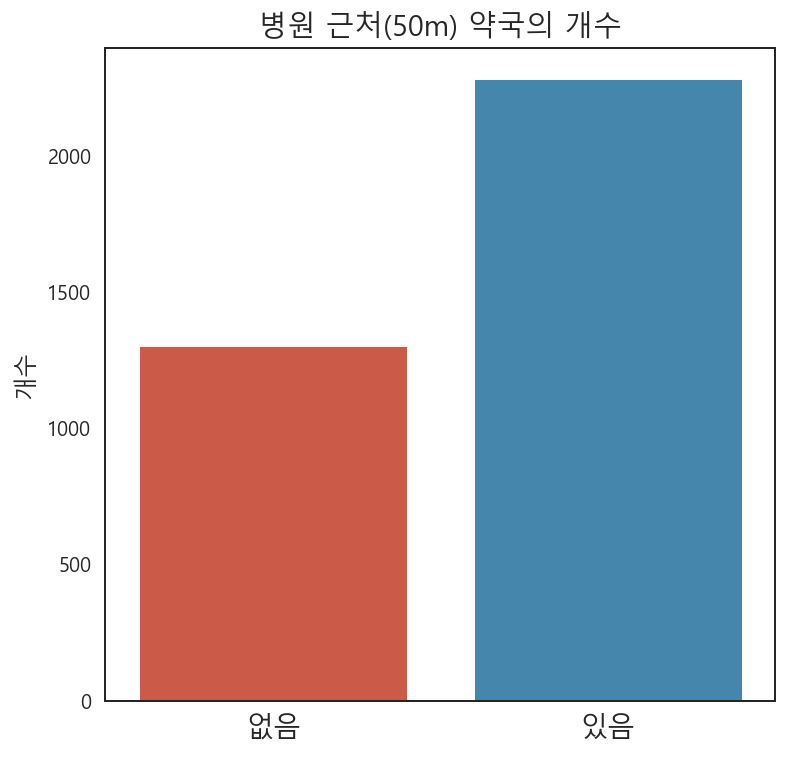

In [304]:
plt.figure(figsize=(6, 6))
g = sns.countplot(ph_df['nearby_hospital'])
g.set_title('병원 근처(50m) 약국의 개수')
g.set_xticklabels(['없음', '있음'], fontdict={'fontsize':14})
g.set_xlabel(''); g.set_ylabel('개수')
plt.show()

#### 병원 근처(50m)에 있는 약국의 수가 약 2배 정도 많으나 예상과는 달리 크게 차이나지는 않습니다

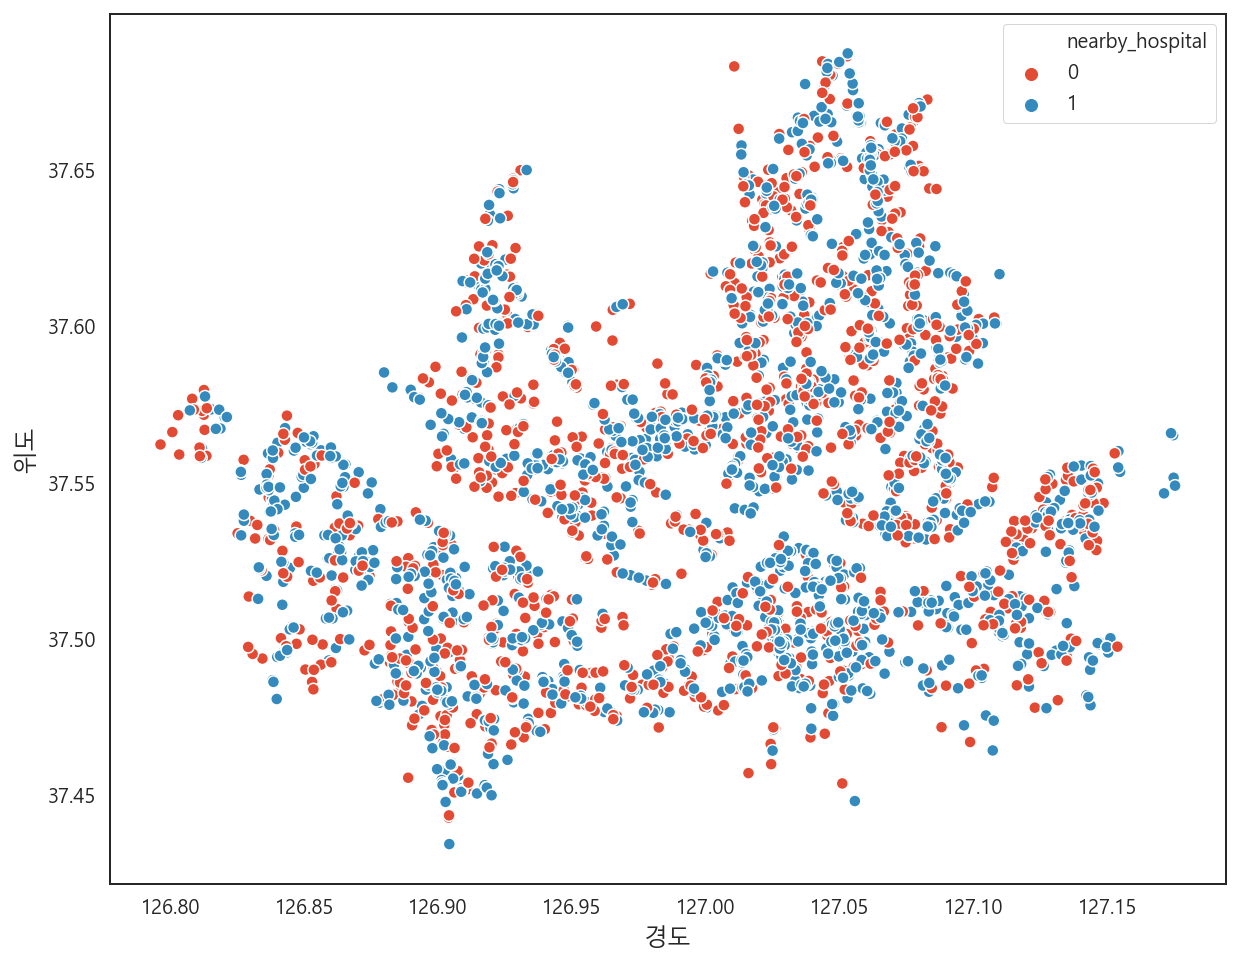

In [291]:
plt.figure(figsize=(10, 8))
sns.set_style("white") # 배경색 = white
plt.rc("font", family=font_family)
sns.scatterplot(x='경도', y='위도', data=ph_df, hue='nearby_hospital')
plt.show()